**KELOMPOK 5**
1. Asti Nurin Hidayanti / 2241720236
2. Astrid Risa Widiana / 2241720250
3. Hafizh Muhammad Rabbani / 2241720242
4. Rio Bagas Hermawan / 2241720193

# KUIS 1 PEMBELAJARAN MESIN
Klasifikasi SVM Pada Data Citra
# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [65]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [66]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


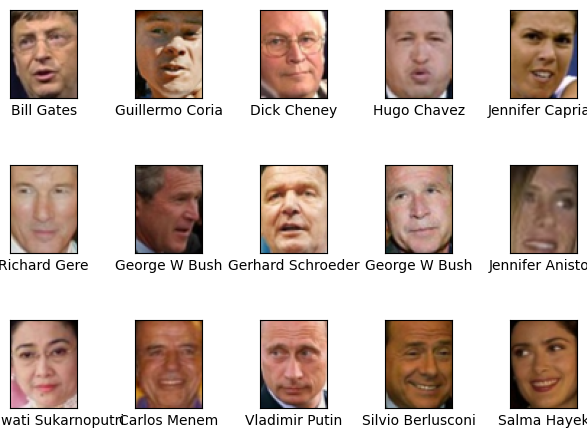

In [67]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Pra Pengolahan


In [68]:
import cv2

def convert_to_rgb(image):
    return cv2.applyColorMap((image * 255).astype(np.uint8), cv2.COLORMAP_JET)

In [69]:
from skimage.transform import resize

# Fungsi untuk pra-pengolahan citra
def preprocess_images(images, target_size=(64, 64)):
    processed_images = []
    for img in images:
        # Resize citra
        img_resized = resize(img, target_size, anti_aliasing=True)
        # Normalisasi citra dengan membagi dengan 255
        img_normalized = img_resized / 255.0
        processed_images.append(img_normalized)
    return np.array(processed_images)

# Melakukan pra-pengolahan citra
faces_processed = preprocess_images(faces.images)

# Mengecek dimensi citra yang telah diproses
print(f'Dimensi citra setelah pra-pengolahan: {faces_processed.shape}')

Dimensi citra setelah pra-pengolahan: (4324, 64, 64, 3)


# Ekstrasi Fitur

In [70]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def extract_histograms(image):
    """Mengambil histogram warna dari gambar RGB."""
    hist_features = np.concatenate(
        [np.histogram(image[:, :, i], bins=256, range=(0, 256))[0] for i in range(3)]
    )
    return hist_features


In [71]:
# mengatur jumlah minimal gambar per label menjadi 150 untuk menaikkan/membuat performa model lebih baik
faces = fetch_lfw_people(min_faces_per_person=150, resize=0.4)

print(f'Total Label: {len(faces.target_names)}')

X = faces.images
y = faces.target

# Reshape the images to 2D
# -1 infers the dimension based on original shape
X_2d = X.reshape(X.shape[0], -1)

std = StandardScaler()

X_hist_features = np.array([extract_histograms(convert_to_rgb(img)) for img in X])
X_hist_features_std = std.fit_transform(X_hist_features)


Total Label: 2


# Membangun Model

In [72]:
# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Membuat objek model SVM
model = SVC(kernel='rbf', C=1, gamma=0.0005)

# Melatih model
model.fit(X_train, y_train)

SVC(C=1, gamma=0.0005)

# Evaluasi Model

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Melakukan prediksi untuk data training dan test
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Menghitung akurasi untuk data training dan test
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Mean CV accuracy: {scores.mean()}')
print(f'Akurasi prediksi data training: {train_accuracy * 100:.2f}%')
print(f'Akurasi prediksi data test: {test_accuracy * 100:.2f}%')

# Identifikasi kelas yang ada di y_train dan y_test
unique_labels_train = np.unique(y_train)
unique_labels_test = np.unique(y_test)

# Menampilkan classification report untuk data training
print("\nClassification Report Data Train:")
print(classification_report(y_train, y_pred_train, target_names=faces.target_names[unique_labels_train]))

# Menampilkan classification report untuk data test
print("\nClassification Report Data Test:")
print(classification_report(y_test, y_pred_test, target_names=faces.target_names[unique_labels_test]))

# Menghitung confusion matrix untuk data test
conf_matrix_test = confusion_matrix(y_test, y_pred_test)


Mean CV accuracy: 0.6895375183260029
Akurasi prediksi data training: 69.12%
Akurasi prediksi data test: 70.13%

Classification Report Data Train:
               precision    recall  f1-score   support

 Colin Powell       1.00      0.01      0.01       190
George W Bush       0.69      1.00      0.82       422

     accuracy                           0.69       612
    macro avg       0.85      0.50      0.41       612
 weighted avg       0.79      0.69      0.57       612


Classification Report Data Test:
               precision    recall  f1-score   support

 Colin Powell       0.00      0.00      0.00        46
George W Bush       0.70      1.00      0.82       108

     accuracy                           0.70       154
    macro avg       0.35      0.50      0.41       154
 weighted avg       0.49      0.70      0.58       154



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


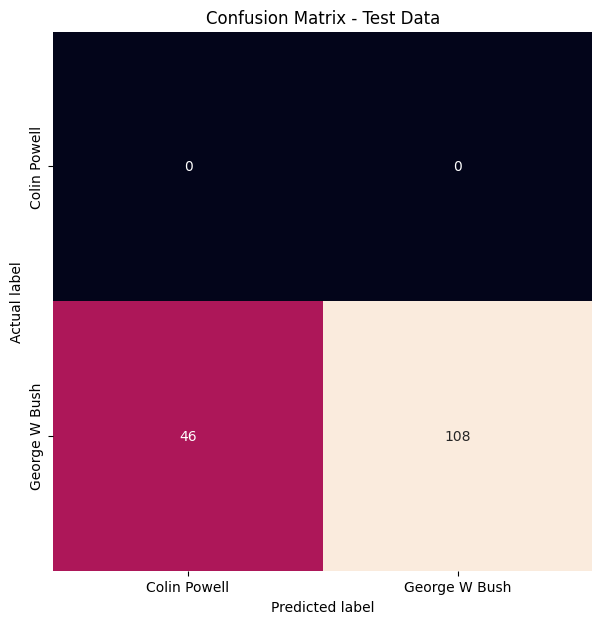

In [10]:
from sklearn.metrics import confusion_matrix
# Menampilkan confusion matrix dengan heatmap untuk data test
plt.figure(figsize=(10, 7))
mat = confusion_matrix(y_test, y_pred_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Test Data')
plt.show()



**CHALLENGE**

**Langkah 1:**

Menggunakan Fitur Lain Selain Histogram
Sebagai alternatif, kita bisa menggunakan fitur HOG (Histogram of Oriented Gradients) untuk ekstraksi fitur.

In [11]:
from skimage.feature import hog
from sklearn.datasets import fetch_lfw_people
import numpy as np

# Mengambil dataset LFW dengan minimal 70 wajah per label
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Menampilkan total label yang ada
print(f"Total Label: {faces.target_names.size}")

# Menyiapkan data dan target
X, y = faces.data, faces.target

# Fungsi untuk mengekstrak fitur HOG dari gambar
def extract_hog_features(images):
    return np.array([hog(img.reshape(50, 37), pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
                     for img in images])

# Mengekstrak fitur HOG
X_hog = extract_hog_features(X)

Total Label: 7


**Langkah 2:**

Menggunakan Model Lain Selain SVM
Kita bisa mencoba model Pipeline dengan PCA sebagai alternatif.

**Langkah 3:**

Evaluasi Menggunakan Metrik Lain dan Confusion Matrix

In [47]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)

model_pipeline = Pipeline([
    ('pca', PCA(n_components=150)),
    ('svc', SVC(kernel='rbf', C=100, gamma=0.1))
])

model_pipeline.fit(X_train, y_train)

yhat_train = model_pipeline.predict(X_train)
yhat_test = model_pipeline.predict(X_test)

acc_train = accuracy_score(y_train,yhat_train)
acc_test = accuracy_score(y_test, yhat_test)

print(f'Akurasi prediksi data training: {acc_train*100:.2f}%')
print(f'Akurasi prediksi data test: {acc_test*100:.2f}%')

print("\nClassification Report Data Train:")
print(classification_report(y_train, yhat_train, target_names=faces.target_names))

print("\nClassification Report Data Test:")
print(classification_report(y_test, yhat_test, target_names=faces.target_names))

Akurasi prediksi data training: 100.00%
Akurasi prediksi data test: 87.98%

Classification Report Data Train:
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      1.00      1.00        66
     Colin Powell       1.00      1.00      1.00       189
  Donald Rumsfeld       1.00      1.00      1.00        99
    George W Bush       1.00      1.00      1.00       411
Gerhard Schroeder       1.00      1.00      1.00        90
      Hugo Chavez       1.00      1.00      1.00        58
       Tony Blair       1.00      1.00      1.00       117

         accuracy                           1.00      1030
        macro avg       1.00      1.00      1.00      1030
     weighted avg       1.00      1.00      1.00      1030


Classification Report Data Test:
                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.73      0.70        11
     Colin Powell       0.85      0.94      0.89        47
  Donald Rumsfeld       0.

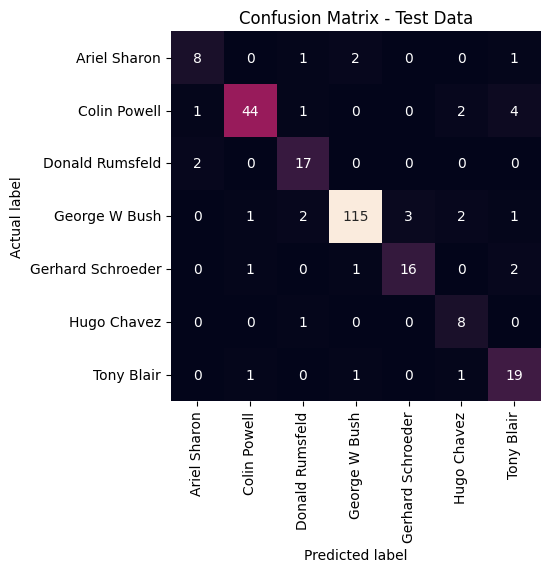

In [49]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, yhat_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Test Data')
plt.show()